In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv('HC4A_unit4.csv')
display(data.shape)
data.head()

(90569, 28)

,STATE,PVASTATE,DOB,MDMAUD,RECP3,GENDER,DOMAIN,INCOME,HOMEOWNR,HV1,...,VETERANS,NUMPROM,CARDPROM,CARDPM12,NUMPRM12,MAXADATE,RFA_2,NGIFTALL,TIMELAG,AVGGIFT
0,IL,NaN,3712,XXXX,NaN,F,T2,NaN,NaN,479,...,NaN,74,27,6,14,9702,L4E,31,4.0,7.741935
1,CA,NaN,5202,XXXX,NaN,M,S1,6.0,H,5468,...,NaN,32,12,6,13,9702,L2G,3,18.0,15.666667
2,NC,NaN,0,XXXX,NaN,M,R2,3.0,U,497,...,NaN,63,26,6,14,9702,L4E,27,12.0,7.481481
3,CA,NaN,2801,XXXX,NaN,F,R2,1.0,U,1000,...,NaN,66,27,6,14,9702,L4E,16,9.0,6.812500
4,FL,NaN,2001,XXXX,X,F,S2,3.0,H,576,...,NaN,113,43,10,25,9702,L2F,37,14.0,6.864865


In [6]:
data.isnull().sum()/len(data)*100
#len(data) nulls divided by length of the dataframe
#multiply by 100 to see the null rate

STATE        0.000000
PVASTATE    98.470779
DOB          0.000000
MDMAUD       0.000000
RECP3       97.976129
GENDER       3.086045
DOMAIN       2.402588
INCOME      22.284667
HOMEOWNR    23.243052
HV1          0.000000
HV2          0.000000
HV3          0.000000
HV4          0.000000
IC1          0.000000
IC2          0.000000
IC3          0.000000
IC4          0.000000
IC5          0.000000
VETERANS    89.128731
NUMPROM      0.000000
CARDPROM     0.000000
CARDPM12     0.000000
NUMPRM12     0.000000
MAXADATE     0.000000
RFA_2        0.000000
NGIFTALL     0.000000
TIMELAG     10.658172
AVGGIFT      0.000000
dtype: float64

In [ ]:
### Numericals

In [7]:
numericals = data.select_dtypes(np.number)
numericals.head()

,DOB,INCOME,HV1,HV2,HV3,HV4,IC1,IC2,IC3,IC4,IC5,NUMPROM,CARDPROM,CARDPM12,NUMPRM12,MAXADATE,NGIFTALL,TIMELAG,AVGGIFT
0,3712,NaN,479,635,3,2,307,318,349,378,12883,74,27,6,14,9702,31,4.0,7.741935
1,5202,6.0,5468,5218,12,10,1088,1096,1026,1037,36175,32,12,6,13,9702,3,18.0,15.666667
2,0,3.0,497,546,2,1,251,292,292,340,11576,63,26,6,14,9702,27,12.0,7.481481
3,2801,1.0,1000,1263,2,1,386,388,396,423,15130,66,27,6,14,9702,16,9.0,6.812500
4,2001,3.0,576,594,4,3,240,250,293,321,9836,113,43,10,25,9702,37,14.0,6.864865


In [8]:
numericals.isnull().sum()/len(numericals)

DOB         0.000000
INCOME      0.222847
HV1         0.000000
HV2         0.000000
HV3         0.000000
HV4         0.000000
IC1         0.000000
IC2         0.000000
IC3         0.000000
IC4         0.000000
IC5         0.000000
NUMPROM     0.000000
CARDPROM    0.000000
CARDPM12    0.000000
NUMPRM12    0.000000
MAXADATE    0.000000
NGIFTALL    0.000000
TIMELAG     0.106582
AVGGIFT     0.000000
dtype: float64

In [ ]:
#### The important income column

In [9]:
numericals['INCOME'].value_counts(dropna=False)

NaN    20183
5.0    14639
2.0    12482
4.0    12092
1.0     8646
3.0     8135
6.0     7347
7.0     7045
Name: INCOME, dtype: int64

<AxesSubplot:>

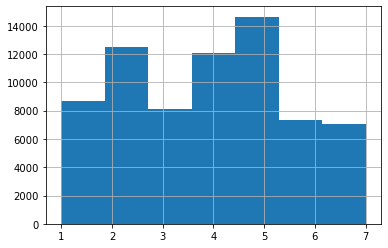

In [11]:
numericals['INCOME'].hist(bins=7)

In [12]:
numericals['INCOME'].mean()
#find the mean to fills the nulls

3.8782570397522234

<AxesSubplot:>

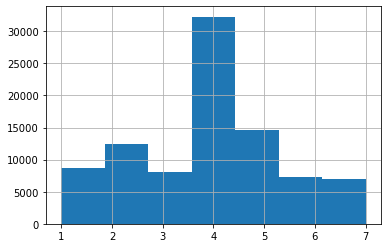

In [14]:
numericals['INCOME'].fillna(data['INCOME'].mean()).hist(bins=7)

In [15]:
numericals['INCOME'].fillna(data['INCOME'].mean()).mean()

3.8782570397529996

In [16]:
numericals.shape

(90569, 19)

In [ ]:
# instead we are going to use all other columns to "predict" income
#make the income as a target

In [17]:
numericals_with_income = numericals[numericals['INCOME'].notna()]
numericals_with_income.shape

(70386, 19)

In [18]:
X_income = numericals_with_income.drop(['INCOME','TIMELAG','AVGGIFT'],axis=1)
#drop income because it's the target, timelag because it has nulls, avggift because it is the ultimate target
#reminder: we're building a model for avggift, we're just filling the nulls of income
y_income = numericals_with_income['INCOME']

In [19]:
X_income.head()

,DOB,HV1,HV2,HV3,HV4,IC1,IC2,IC3,IC4,IC5,NUMPROM,CARDPROM,CARDPM12,NUMPRM12,MAXADATE,NGIFTALL
1,5202,5468,5218,12,10,1088,1096,1026,1037,36175,32,12,6,13,9702,3
2,0,497,546,2,1,251,292,292,340,11576,63,26,6,14,9702,27
3,2801,1000,1263,2,1,386,388,396,423,15130,66,27,6,14,9702,16
4,2001,576,594,4,3,240,250,293,321,9836,113,43,10,25,9702,37
6,6001,484,519,3,3,251,284,278,311,10717,63,26,4,9,9702,14


In [21]:
from sklearn.neighbors import KNeighborsClassifier
#make predictions using KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
#fit the data using minmax scaler

In [22]:
X_normalized_income = pd.DataFrame(MinMaxScaler().fit_transform(X_income), columns=X_income.columns)
X_normalized_income
#fit and transform instead of doing train test split

,DOB,HV1,HV2,HV3,HV4,IC1,IC2,IC3,IC4,IC5,NUMPROM,CARDPROM,CARDPM12,NUMPRM12,MAXADATE,NGIFTALL
0,0.535736,0.911333,0.869667,0.923077,0.769231,0.725333,0.730667,0.684000,0.691333,0.227079,0.146597,0.183333,0.352941,0.144737,1.0,0.008475
1,0.000000,0.082833,0.091000,0.153846,0.076923,0.167333,0.194667,0.194667,0.226667,0.072665,0.308901,0.416667,0.352941,0.157895,1.0,0.110169
2,0.288465,0.166667,0.210500,0.153846,0.076923,0.257333,0.258667,0.264000,0.282000,0.094974,0.324607,0.433333,0.352941,0.157895,1.0,0.063559
3,0.206076,0.096000,0.099000,0.307692,0.230769,0.160000,0.166667,0.195333,0.214000,0.061743,0.570681,0.700000,0.588235,0.302632,1.0,0.152542
4,0.618023,0.080667,0.086500,0.230769,0.230769,0.167333,0.189333,0.185333,0.207333,0.067273,0.308901,0.416667,0.235294,0.092105,1.0,0.055085
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70381,0.288465,0.153667,0.207333,0.307692,0.307692,0.228000,0.273333,0.272000,0.323333,0.155518,0.136126,0.166667,0.235294,0.105263,1.0,0.008475
70382,0.464058,0.056833,0.070167,0.153846,0.076923,0.106000,0.123333,0.142667,0.157333,0.047343,0.178010,0.266667,0.352941,0.131579,1.0,0.038136
70383,0.494645,0.122167,0.145833,0.307692,0.230769,0.190000,0.192000,0.222000,0.222667,0.071498,0.287958,0.366667,0.294118,0.131579,1.0,0.097458
70384,0.515036,0.279833,0.287167,0.230769,0.230769,0.537333,0.557333,0.534667,0.566000,0.166585,0.031414,0.050000,0.176471,0.078947,1.0,0.000000


In [23]:
display(X_normalized_income.shape)
display(y_income.shape)

(70386, 16)

(70386,)

In [24]:
KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(X_normalized_income,y_income)
KNN.score(X_normalized_income,y_income)

0.5248628988719347

In [ ]:
## now on to predict the INCOME from the other features

In [25]:
numericals.shape

(90569, 19)

In [26]:
X_all = numericals.drop(['INCOME','TIMELAG','AVGGIFT'],axis=1)
X_normalized_all = pd.DataFrame(MinMaxScaler().fit_transform(X_all), columns=X_all.columns)
y_all = numericals['INCOME']

In [27]:
y_all.shape

(90569,)

In [28]:
predicted_income = pd.Series(KNN.predict(X_normalized_all),name='predicted_income')
#make prediction of all of the rows

In [29]:
predicted_income.value_counts(dropna=False)

2.0    23520
1.0    22441
4.0    13111
5.0    12553
3.0    10533
7.0     4265
6.0     4146
Name: predicted_income, dtype: int64

In [30]:
numericals['INCOME'].value_counts(dropna=False)

NaN    20183
5.0    14639
2.0    12482
4.0    12092
1.0     8646
3.0     8135
6.0     7347
7.0     7045
Name: INCOME, dtype: int64

In [31]:
len(predicted_income)

90569

In [32]:
len(data)

90569

In [33]:
data = pd.concat([data,predicted_income],axis=1)


In [34]:
data[['INCOME','predicted_income']].head(25)

,INCOME,predicted_income
0,NaN,4.0
1,6.0,6.0
2,3.0,2.0
3,1.0,1.0
4,3.0,1.0
5,NaN,2.0
6,4.0,2.0
7,2.0,1.0
8,3.0,3.0
9,NaN,2.0


In [35]:
data.INCOME.mean()

3.8782570397522234

In [36]:
data.predicted_income.mean()

2.992414623105036

In [37]:
data['final_income'] =  np.where(data['INCOME'].isna(), data['predicted_income'], data['INCOME'])
data[['INCOME','predicted_income','final_income']].head(25)

,INCOME,predicted_income,final_income
0,NaN,4.0,4.0
1,6.0,6.0,6.0
2,3.0,2.0,3.0
3,1.0,1.0,1.0
4,3.0,1.0,3.0
5,NaN,2.0,2.0
6,4.0,2.0,4.0
7,2.0,1.0,2.0
8,3.0,3.0,3.0
9,NaN,2.0,2.0


In [38]:
data['final_income'].mean()

3.6379997570912783

<AxesSubplot:>

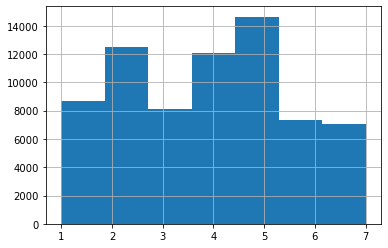

In [39]:
#now with same distribution as before!
data['INCOME'].hist(bins=7)

<AxesSubplot:>

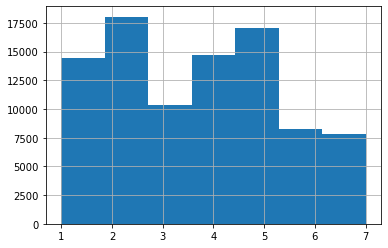

In [41]:
data['final_income'].hist(bins=7)

In [42]:
display(data['final_income'].mean())
display(data['INCOME'].mean())

3.6379997570912783

3.8782570397522234

In [43]:
data.final_income.value_counts(dropna=False)

2.0    18040
5.0    17076
4.0    14677
1.0    14437
3.0    10318
6.0     8216
7.0     7805
Name: final_income, dtype: int64

In [44]:
data.drop(['INCOME','predicted_income'],axis=1,inplace=True)
data.head()

,STATE,PVASTATE,DOB,MDMAUD,RECP3,GENDER,DOMAIN,HOMEOWNR,HV1,HV2,...,NUMPROM,CARDPROM,CARDPM12,NUMPRM12,MAXADATE,RFA_2,NGIFTALL,TIMELAG,AVGGIFT,final_income
0,IL,NaN,3712,XXXX,NaN,F,T2,NaN,479,635,...,74,27,6,14,9702,L4E,31,4.0,7.741935,4.0
1,CA,NaN,5202,XXXX,NaN,M,S1,H,5468,5218,...,32,12,6,13,9702,L2G,3,18.0,15.666667,6.0
2,NC,NaN,0,XXXX,NaN,M,R2,U,497,546,...,63,26,6,14,9702,L4E,27,12.0,7.481481,3.0
3,CA,NaN,2801,XXXX,NaN,F,R2,U,1000,1263,...,66,27,6,14,9702,L4E,16,9.0,6.812500,1.0
4,FL,NaN,2001,XXXX,X,F,S2,H,576,594,...,113,43,10,25,9702,L2F,37,14.0,6.864865,3.0


In [45]:
len(data)

90569

In [ ]:
### Now the timelag problem. Activity 2: could you do the same here?

In [52]:
data['TIMELAG'].value_counts(dropna=False).tail(20)

41.0      8
49.0      7
50.0      5
45.0      4
52.0      2
56.0      2
57.0      2
59.0      2
51.0      2
54.0      2
89.0      1
442.0     1
53.0      1
1044.0    1
90.0      1
61.0      1
55.0      1
58.0      1
62.0      1
1088.0    1
Name: TIMELAG, dtype: int64

In [46]:
data['TIMELAG'].nunique()

67

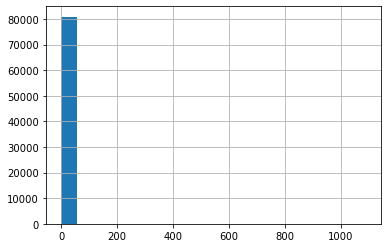

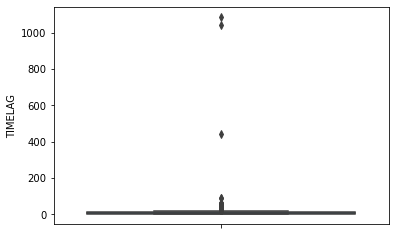

In [49]:
#ooof ... HEAVYYYYYY skew
data['TIMELAG'].hist(bins=20)
plt.show()

sns.boxplot(y=data['TIMELAG'])
plt.show()

In [53]:
def log_transfom_clean(x):
    if x>0:
        return np.log(x)
    else:
        return np.NAN # We are returning NaNs so that we can replace them later

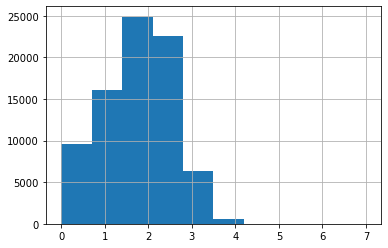

In [54]:
pd.Series(data['TIMELAG'].apply(log_transfom_clean)).hist()
plt.show()

In [55]:
data['TIMELAG'].mean()

8.114377873350142

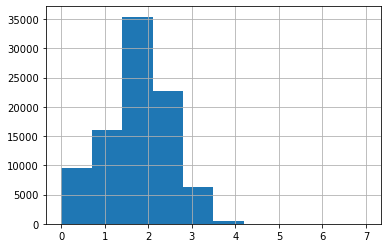

In [56]:
data['TIMELAG_transformed'] = data['TIMELAG'].apply(log_transfom_clean)
data['TIMELAG_transformed'] = data['TIMELAG_transformed'].fillna(np.mean(data['TIMELAG_transformed']))
data['TIMELAG_transformed'].hist()
plt.show()

In [58]:
data['TIMELAG_transformed'].mean()
#np.e**data['TIMELAG_transformed'].mean()




6.214430633520652

In [ ]:
# WORD OF WARNING ON ACTIVITY 3
# just like with boxplots, logarithmic transforms and scales are NOT for the final user
# if you have a quantity that you need to express that would require a log transform you're better off binning the data

In [59]:
data['TIMELAG_transformed'].value_counts(dropna=False)

1.826874    10507
1.609438     8106
1.386294     8042
1.098612     7995
1.791759     6257
            ...  
4.110874        1
4.007333        1
4.060443        1
4.127134        1
6.992096        1
Name: TIMELAG_transformed, Length: 67, dtype: int64

In [62]:
np.nanpercentile(data['TIMELAG'],75)

11.0

In [65]:
# Checking how many values will be removed if the outliers are removed
iqr = np.nanpercentile(data['TIMELAG'],75) - np.nanpercentile(data['TIMELAG'],25)
upper_limit = np.nanpercentile(data['TIMELAG'],75) + 1.5*iqr
print(upper_limit)

extraordinary_points = data[data['TIMELAG'] >200]
len(extraordinary_points)  # This checks the number of points that will be removed

21.5


3

In [66]:
# If we wanted to drop the rows that are above upper_limit
data_timelagNaN_dropped = data[data['TIMELAG'] <= upper_limit].copy()
# however, using <= also removes the rows for which TIMELAG is NaN, se we would need to fillna first.

In [67]:
len(data_timelagNaN_dropped)

77183

<AxesSubplot:>

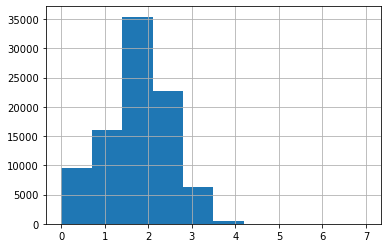

In [68]:
data['TIMELAG_transformed'].hist()

In [ ]:
# save intermediate results

In [ ]:
#data.to_csv('HC4A_unit4_ver1.csv', index=False)

In [ ]:
np.log(50)

In [ ]:
data_timelag_dropped = data[data['TIMELAG_transformed'] <= np.log(50)].copy()

In [ ]:
len(data_timelag_dropped)